In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Adam import AdamOptim
from SGD import SGD
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from Logreg_old import LogisticRegression
from irls_optimizer import IRLS
from sklearn.preprocessing import LabelEncoder
np.seterr(divide = 'ignore') 
np.seterr(invalid='ignore')
np.seterr(over ='ignore')


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## NBA PLAYERS DATA ##

In [2]:
# data:
url = 'data/big/nba-players.csv'
dataframe = pd.read_csv(url)
dataframe.drop('name', axis=1, inplace=True)
dataframe.drop('Unnamed: 0', axis=1, inplace=True)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]


Early stopping after epoch 7
accuracy : 0.6903054210746519
Early stopping after epoch 9
accuracy : 0.6804777268353427
Early stopping after epoch 433
accuracy : 0.6516731855714907
Early stopping after epoch 8
accuracy : 0.6896562214785519
accuracy : 0.6270267151347297


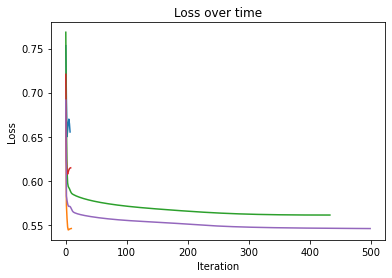

In [3]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Early stopping after epoch 5
accuracy : 0.7100890562429024
Early stopping after epoch 8
accuracy : 0.6536480443765212
Early stopping after epoch 7
accuracy : 0.631588750232818
Early stopping after epoch 5
accuracy : 0.7227867356251901
Early stopping after epoch 6
accuracy : 0.6410478333621834


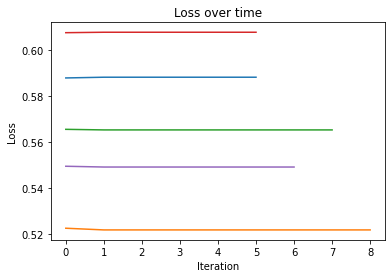

In [4]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5


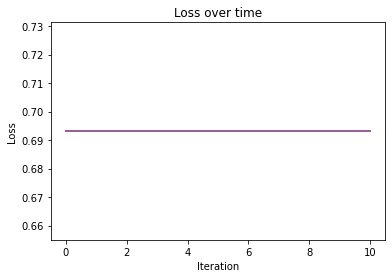

In [5]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD(eta=0.001)

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=10, epochs=500, batch_size=1, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [6]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

lda: 0.6785607554838324
qda: 0.7042316657701273
dt: 0.5969457892534815
rf: 0.6675930906700137
lda: 0.6446765155374428
qda: 0.6522895794418974
dt: 0.5671308088526632
rf: 0.6399784909718684
lda: 0.664555783199851
qda: 0.6733718259141988
dt: 0.6193580430868566
rf: 0.672564723412181
lda: 0.7238211134773349
qda: 0.6611499847885609
dt: 0.5739580164283541
rf: 0.6762397322786735
lda: 0.63017136922278
qda: 0.6717442732675553
dt: 0.5632104321735618
rf: 0.5949166233916104


## SMOKING DATA ##

In [8]:
url = "data/big/smoking.csv"
dataframe = pd.read_csv(url)
dataframe.drop('oral', axis=1, inplace=True)
data = dataframe.values

X, y = data[:,:-1], data[:,-1]
X[:,1] = LabelEncoder().fit_transform(X[:,1])
X[:,-1] = LabelEncoder().fit_transform(X[:,-1])

Early stopping after epoch 16
accuracy : 0.6189194201742141
Early stopping after epoch 17
accuracy : 0.6981088842319789
Early stopping after epoch 22
accuracy : 0.672524867715766
Early stopping after epoch 19
accuracy : 0.7264114677021603
Early stopping after epoch 15
accuracy : 0.5528672513092175


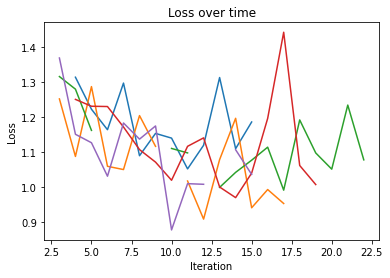

In [8]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64)#, Xval=X_val, yval=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [3]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=5, epochs=500, batch_size=64)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

[0.0 0.0 0.0 ... 0.0 0.0 0.0]
0.0


TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5


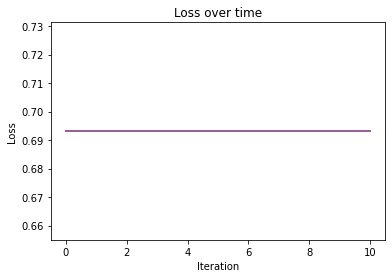

In [4]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD()

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [10]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    comparison_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

lda: 0.7391451033229804
qda: 0.7272146062242413
dt: 0.7479017494500091
rf: 0.8234056666642672
lda: 0.745349763402287
qda: 0.7415276882144005
dt: 0.7526719715180362
rf: 0.8235751729624032
lda: 0.741751362518593
qda: 0.7396250760577121
dt: 0.754763404677525
rf: 0.8226833576986219
lda: 0.7503095990672303
qda: 0.7445017145490753
dt: 0.7518372502553767
rf: 0.8242277134415832
lda: 0.7433894504832903
qda: 0.7314483484049776
dt: 0.7526066188364702
rf: 0.8177315027066678


## BANANA DATA ##

In [11]:
from sklearn.impute import SimpleImputer
url = 'data/small/banana_quality.csv'
dataframe = pd.read_csv(url)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]
y = LabelEncoder().fit_transform(y)


Early stopping after epoch 94
accuracy : 0.8785627518021883
Early stopping after epoch 72
accuracy : 0.8811576807000598
Early stopping after epoch 80
accuracy : 0.8818268766438655
Early stopping after epoch 94
accuracy : 0.8789640856342538
Early stopping after epoch 82
accuracy : 0.8799323712866551


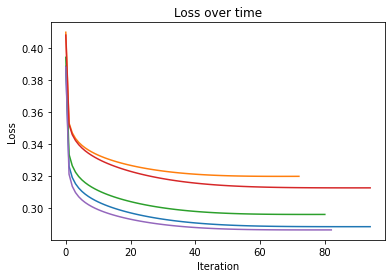

In [15]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [16]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32, X_val=X_val, y_val=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

[0.0 0.0 0.0 ... 0.0 0.0 0.0]
0.0


TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5
Early stopping after epoch 10
accuracy : 0.5


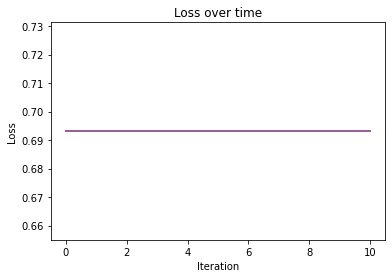

In [17]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD()

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [18]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

lda: 0.880126915338183
qda: 0.9255087635369326
dt: 0.9386263189080091
rf: 0.9717848661510633
lda: 0.8822861036742515
qda: 0.924446455392127
dt: 0.9319890721143552
rf: 0.9719183659435069
lda: 0.8826840699569762
qda: 0.9207389209522425
dt: 0.9318707130566872
rf: 0.9699599455522059
lda: 0.8763880552220888
qda: 0.9172669067627051
dt: 0.9272709083633454
rf: 0.9694252701080432
lda: 0.8867438625217418
qda: 0.9270991642082249
dt: 0.9293011751900488
rf: 0.9692722228234361


### with interactions ###

In [21]:
from utils import createFeatureInteractions
X_int = createFeatureInteractions(X)
print(len(X[0]),len(X_int[0]))

7 28


Early stopping after epoch 28
accuracy : 0.9600368332762699
Early stopping after epoch 28
accuracy : 0.9612600827405986
Early stopping after epoch 28
accuracy : 0.9537240634557471
Early stopping after epoch 31
accuracy : 0.9498549419767908
Early stopping after epoch 30
accuracy : 0.9470717488578244


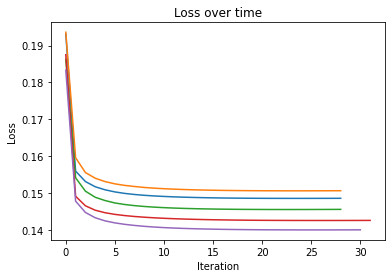

In [22]:
#ADAM
splitting_seeds = [42, 43, 44, 45, 46]
adam_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    adam_optimizer = AdamOptim(eta=0.01)

    logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=500, batch_size=64)#, Xval=X_val, yval=y_val)
    y_pred = logistic_regression_model.predict(X_test)
    adam_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

In [23]:
#SGD
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    sgd_optimizer = SGD(eta=0.001)

    logistic_regression_model.train(X_train, y_train, optimizer=sgd_optimizer, patience=5, epochs=500, batch_size=1)
    y_pred = logistic_regression_model.predict(X_test)
    sgd_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")

Early stopping after epoch 5
accuracy : 0.5
Early stopping after epoch 5
accuracy : 0.5
Early stopping after epoch 5
accuracy : 0.5
Early stopping after epoch 5
accuracy : 0.5
Early stopping after epoch 5
accuracy : 0.5


In [25]:
#IRLS
splitting_seeds = [42, 43, 44, 45, 46]
irls_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size=0.2, random_state=seed)
    logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
    irls_optimizer = IRLS()

    logistic_regression_model.train(X_train, y_train, optimizer=irls_optimizer, patience=10, epochs=500, batch_size=32)
    y_pred = logistic_regression_model.predict(X_test)
    irls_accuracy.append(balanced_accuracy_score(y_test,y_pred.round()))
    print(f"accuracy : {balanced_accuracy_score(y_test,y_pred.round())}")
    logistic_regression_model.plot_loss()

[0.0 0.0 0.0 ... 0.0 0.0 0.0]
0.0


TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [26]:
# Comparison Models
from utils import fitComparisonModels
splitting_seeds = [42, 43, 44, 45, 46]
comparison_accuracy = []
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
splitting_seeds = [42, 43, 44, 45, 46]
sgd_accuracy = []
for seed in splitting_seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
    sgd_accuracy.append((balanced_accuracy_score(y_test,y_lda), balanced_accuracy_score(y_test,y_qda), balanced_accuracy_score(y_test,y_dt), balanced_accuracy_score(y_test,y_rf)))
    print(F"lda: {balanced_accuracy_score(y_test,y_lda)}")
    print(f"qda: {balanced_accuracy_score(y_test,y_qda)}")
    print(f"dt: {balanced_accuracy_score(y_test,y_dt)}")
    print(f"rf: {balanced_accuracy_score(y_test,y_rf)}")

lda: 0.880126915338183
qda: 0.9255087635369326
dt: 0.9367651128214509
rf: 0.9743159813582349
lda: 0.8822861036742515
qda: 0.924446455392127
dt: 0.9382610408060879
rf: 0.9725333720935685
lda: 0.8826840699569762
qda: 0.9207389209522425
dt: 0.9362551357366002
rf: 0.97057646836355
lda: 0.8763880552220888
qda: 0.9172669067627051
dt: 0.9260204081632653
rf: 0.9675620248099239
lda: 0.8867438625217418
qda: 0.9270991642082249
dt: 0.9358562356590898
rf: 0.9650728749574575
